In [1]:
import pandas as pd

In [2]:
data_latih = pd.read_csv('../output/tf-idf/dataset_merge_clean_extract_fix.csv', encoding='utf-8')
data_latih

,aa,aad,aal,aamiin,aamiinyra,aatau,aau,aaya,abad,abadi,...,zebra,zee,zeejkt,zero,zombi,zombie,zoo,zoom,zumar,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SMOTE

In [3]:
# SMOTE
# !pip install imblearn

from imblearn.over_sampling import SMOTE

In [4]:
X = data_latih.drop('sentimen', axis=1)
y = data_latih['sentimen']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [5]:
X_res_df = pd.DataFrame(X_res)
X_res_df['sentimen'] = y_res
X_res_df

C:\Users\Dell 7300\AppData\Local\Temp\ipykernel_16776\3262695030.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_res_df['sentimen'] = y_res


,aa,aad,aal,aamiin,aamiinyra,aatau,aau,aaya,abad,abadi,...,zee,zeejkt,zero,zombi,zombie,zoo,zoom,zumar,zumba,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif


### Visualisasi

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

Counter({'negatif': 2390, 'positif': 1459, 'netral': 435})


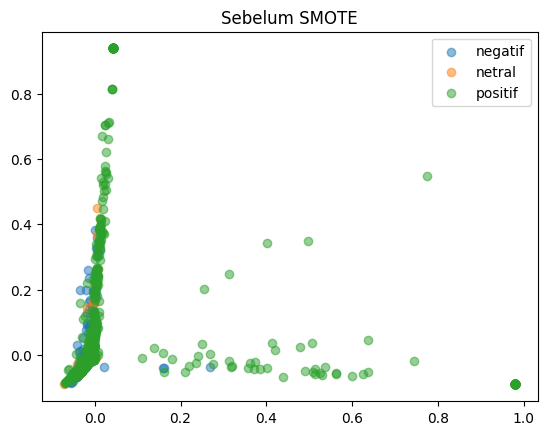

Counter({'positif': 2390, 'negatif': 2390, 'netral': 2390})


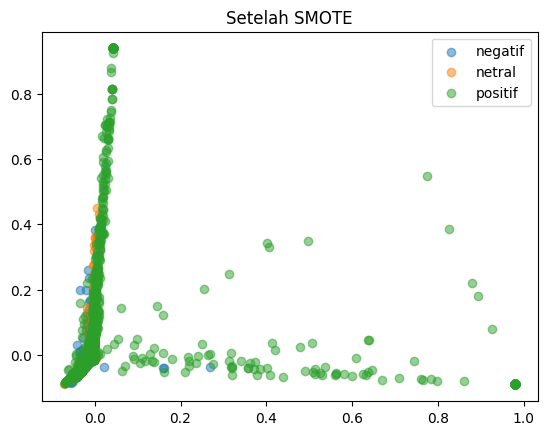

In [7]:
# Mengurangi dimensi dengan PCA agar bisa divisualisasikan dalam 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Ubah label menjadi angka
le = LabelEncoder()
y_num = le.fit_transform(y)
y_res_num = le.transform(y_res)

# Plot data asli
print(Counter(y))
for label in np.unique(y_num):
    label_str = le.inverse_transform([label])[0]
    plt.scatter(X_pca[y_num == label, 0], X_pca[y_num == label, 1], label=label_str, alpha=0.5)
plt.title('Sebelum SMOTE')
plt.legend()
plt.show()

# Plot data setelah SMOTE
print(Counter(y_res))
for label in np.unique(y_res_num):
    label_str = le.inverse_transform([label])[0]
    plt.scatter(X_res_pca[y_res_num == label, 0], X_res_pca[y_res_num == label, 1], label=label_str, alpha=0.5)
plt.title('Setelah SMOTE')
plt.legend()
plt.show()


In [8]:
print(type(X_res))
print(type(y_res))
print(X_res.shape)
print(y_res.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(7170, 8752)
(7170,)


### KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier(n_neighbors=5)

#### K-Fold Cross Validation

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [30]:
conf_matrices = []
class_reports = []

precisions = []
recalls = []
f1_scores = []
accuracies = []

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Fold 1:

Confusion Matrix:
 [[ 33 184  32]
 [  0 236   5]
 [  1  59 167]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.97      0.13      0.23       249
      netral       0.49      0.98      0.66       241
     positif       0.82      0.74      0.77       227

    accuracy                           0.61       717
   macro avg       0.76      0.62      0.55       717
weighted avg       0.76      0.61      0.55       717

Accuracy:  0.6080892608089261

----------------------



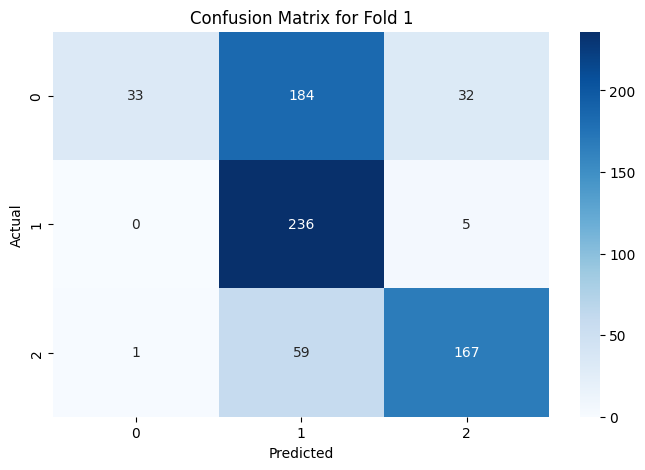

Fold 2:

Confusion Matrix:
 [[ 29 164  38]
 [  1 258   2]
 [  3  52 170]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.13      0.22       231
      netral       0.54      0.99      0.70       261
     positif       0.81      0.76      0.78       225

    accuracy                           0.64       717
   macro avg       0.74      0.62      0.57       717
weighted avg       0.74      0.64      0.57       717

Accuracy:  0.6373779637377964

----------------------



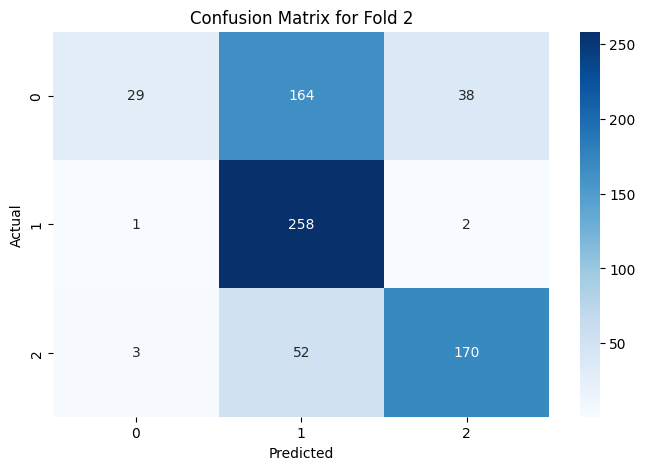

Fold 3:

Confusion Matrix:
 [[ 25 167  42]
 [  1 224   2]
 [  4  55 197]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.83      0.11      0.19       234
      netral       0.50      0.99      0.67       227
     positif       0.82      0.77      0.79       256

    accuracy                           0.62       717
   macro avg       0.72      0.62      0.55       717
weighted avg       0.72      0.62      0.56       717

Accuracy:  0.6220362622036262

----------------------



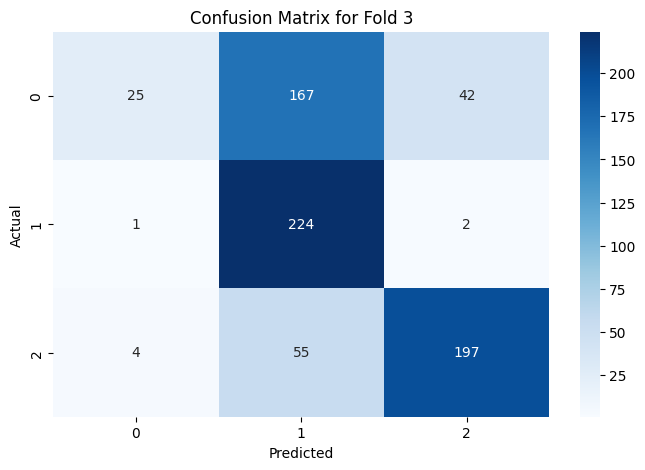

Fold 4:

Confusion Matrix:
 [[ 30 169  41]
 [  0 231   1]
 [  3  45 197]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.91      0.12      0.22       240
      netral       0.52      1.00      0.68       232
     positif       0.82      0.80      0.81       245

    accuracy                           0.64       717
   macro avg       0.75      0.64      0.57       717
weighted avg       0.75      0.64      0.57       717

Accuracy:  0.6387726638772664

----------------------



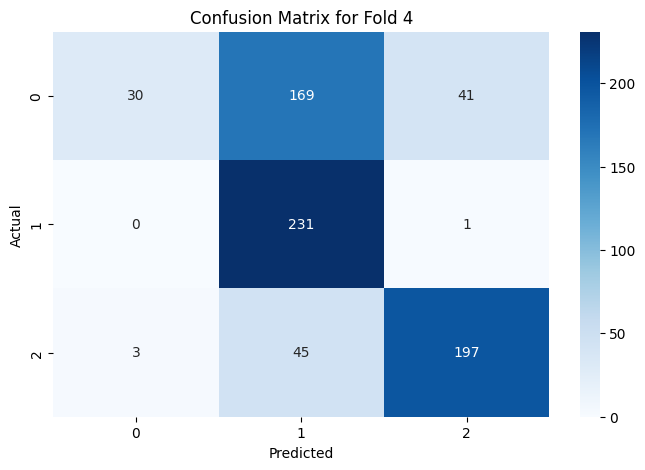

Fold 5:

Confusion Matrix:
 [[ 18 182  38]
 [  0 235   0]
 [  7  45 192]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.72      0.08      0.14       238
      netral       0.51      1.00      0.67       235
     positif       0.83      0.79      0.81       244

    accuracy                           0.62       717
   macro avg       0.69      0.62      0.54       717
weighted avg       0.69      0.62      0.54       717

Accuracy:  0.6206415620641562

----------------------



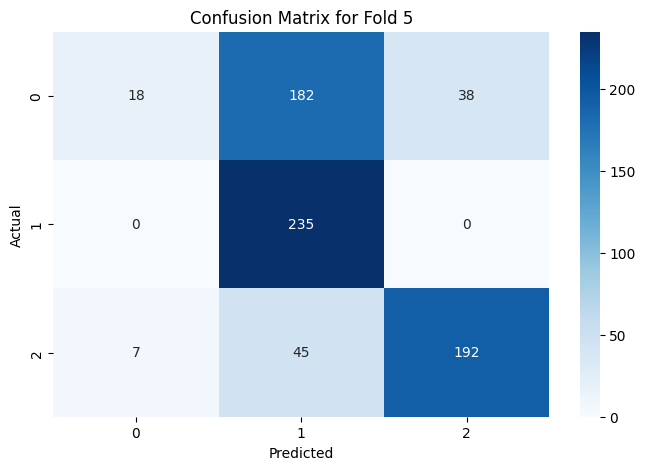

Fold 6:

Confusion Matrix:
 [[ 30 165  33]
 [  2 249   2]
 [  2  51 183]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.13      0.23       228
      netral       0.54      0.98      0.69       253
     positif       0.84      0.78      0.81       236

    accuracy                           0.64       717
   macro avg       0.75      0.63      0.58       717
weighted avg       0.75      0.64      0.58       717

Accuracy:  0.6443514644351465

----------------------



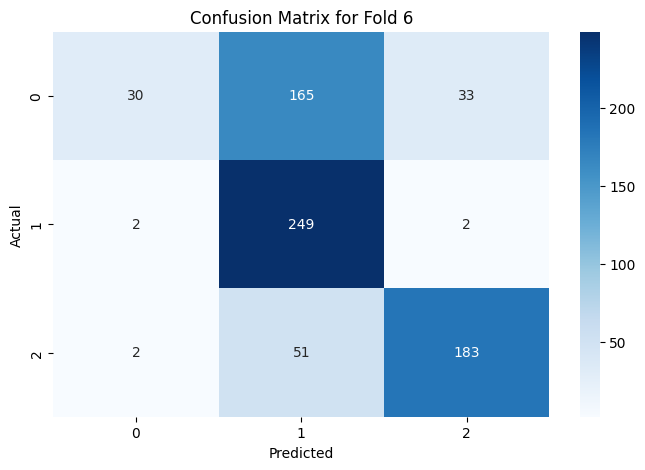

Fold 7:

Confusion Matrix:
 [[ 40 161  37]
 [  2 258   1]
 [  3  46 169]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.89      0.17      0.28       238
      netral       0.55      0.99      0.71       261
     positif       0.82      0.78      0.80       218

    accuracy                           0.65       717
   macro avg       0.75      0.64      0.60       717
weighted avg       0.75      0.65      0.59       717

Accuracy:  0.6513249651324965

----------------------



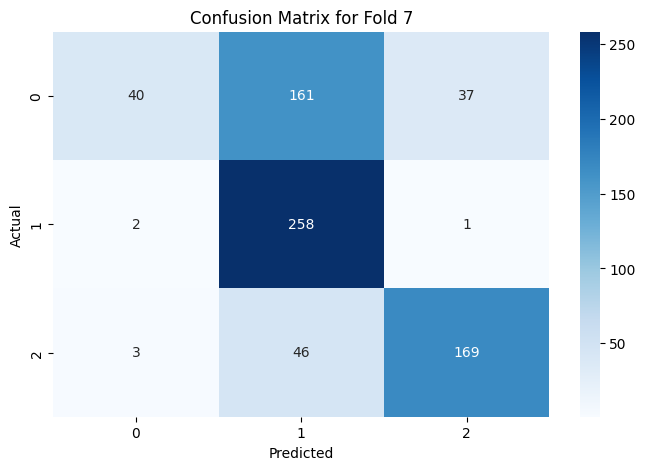

Fold 8:

Confusion Matrix:
 [[ 42 178  43]
 [  1 207   1]
 [  1  71 173]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.95      0.16      0.27       263
      netral       0.45      0.99      0.62       209
     positif       0.80      0.71      0.75       245

    accuracy                           0.59       717
   macro avg       0.74      0.62      0.55       717
weighted avg       0.75      0.59      0.54       717

Accuracy:  0.5885634588563459

----------------------



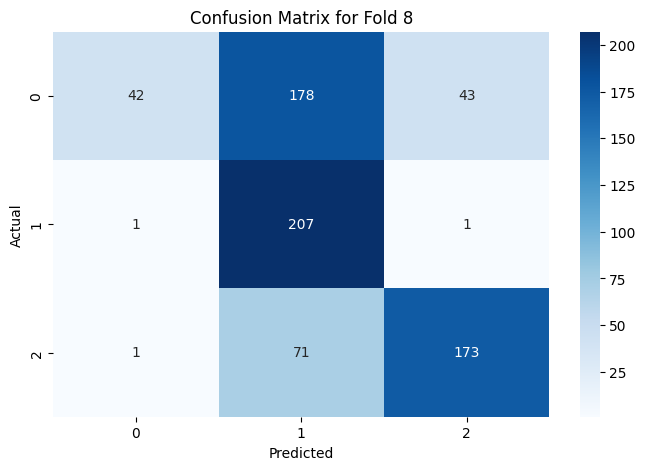

Fold 9:

Confusion Matrix:
 [[ 38 162  42]
 [  0 240   0]
 [  2  51 182]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.95      0.16      0.27       242
      netral       0.53      1.00      0.69       240
     positif       0.81      0.77      0.79       235

    accuracy                           0.64       717
   macro avg       0.76      0.64      0.59       717
weighted avg       0.76      0.64      0.58       717

Accuracy:  0.6415620641562064

----------------------



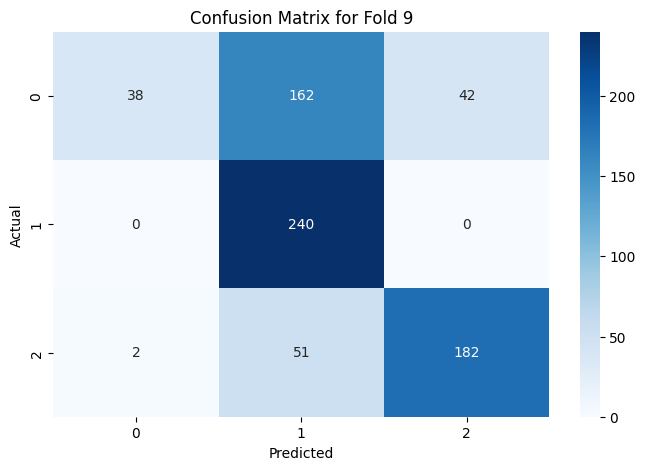

Fold 10:

Confusion Matrix:
 [[ 38 156  33]
 [  0 231   0]
 [  2  53 204]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.95      0.17      0.28       227
      netral       0.53      1.00      0.69       231
     positif       0.86      0.79      0.82       259

    accuracy                           0.66       717
   macro avg       0.78      0.65      0.60       717
weighted avg       0.78      0.66      0.61       717

Accuracy:  0.6596931659693166

----------------------



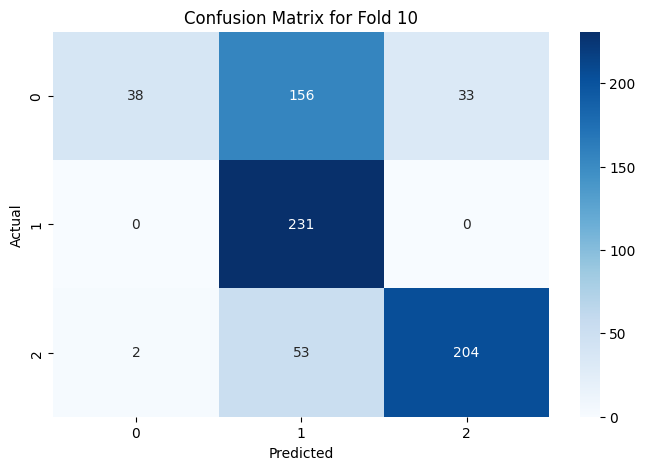

In [32]:
kFold = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kFold.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))  
    
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

for i, (conf_matrix, class_report) in enumerate(zip(conf_matrices, class_reports)):
    print(f"Fold {i+1}:\n")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("Accuracy: ", accuracies[i]) 
    print("\n----------------------\n")

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()

In [64]:
import numpy as np

In [65]:
# total_conf_matrix = np.zeros((2, 2))
total_conf_matrix = np.zeros((3, 3))

for conf_matrix in conf_matrices:
    total_conf_matrix += conf_matrix

avg_conf_matrix = total_conf_matrix / len(conf_matrices)

print("Rata-Rata Confusion Matrix:\n", avg_conf_matrix)

Rata-Rata Confusion Matrix:
 [[194.9  10.2  33.9]
 [ 23.8   9.7  10. ]
 [ 40.7   6.1  99.1]]


In [66]:
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Rata-Rata Precision: ", avg_precision)
print("Rata-Rata Recall: ", avg_recall)
print("Rata-Rata F1-Score: ", avg_f1_score)
print("Rata-Rata Accuracy: ", avg_accuracy)

Rata-Rata Precision:  0.602528291025911
Rata-Rata Recall:  0.5715855342450659
Rata-Rata F1-Score:  0.5797503462316456
Rata-Rata Accuracy:  0.708915539289371
